In [1]:
import numpy as np     #只需要下载numpy库即可
import random
import GridWorld_v3
from draw import draw  #绘图函数
from ExperienceReplayBuffer import ExperienceReplayBuffer
import tqdm

In [2]:
rows = 5      #记得行数和列数这里要同步改
columns = 5
gridworld = GridWorld_v3.GridWorld_v3(forbiddenAreaScore=-10, score=1,desc = [".....",".##..","..#..",".#T#.",".#..."]) 
gridworld.show()
trajectorySteps = 1000

⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️


In [3]:
state_values = np.array([random.random() for i in range(25)])
learning_rate = 0.01
gamma = 0.99

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class model(nn.Module):
    def __init__(self):
        super(model, self).__init__()
        self.fc1 = nn.Linear(2,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,1)  #拟合的state value，一个输出即可
    def forward(self, state):
        h1 = self.fc1(state)
        h1 = F.relu(h1)
        h2 = self.fc2(h1)
        h2 = F.relu(h2)
        Q = self.fc3(h2)
        return Q
        

In [5]:
experiencePool = ExperienceReplayBuffer(max_size=10000)
policy = 0.2 * np.ones((rows*columns,5))
episodes = [gridworld.getTrajectoryScore(nowState = 10,action = random.randint(0,4),policy = policy) 
            for i in range(500)]
for trajectory in episodes:
    for exp in trajectory:
        experiencePool.add_expericence(exp)

In [6]:
lr = 0.001
network = model()
optimizer = optim.Adam(network.parameters(), lr = lr)
batch_size = 100

In [25]:
batch = experiencePool.sample_batch(batch_size=batch_size)
tmpstate, tmpaction, tmpscore, nextState, nextAction, terminal = batch

In [26]:
tmpstate = tmpstate.reshape(batch_size,1)
tmpstate = np.hstack((tmpstate // 5, tmpstate % 5))  #将state变成了行列

In [1]:
len(tmpstate)

NameError: name 'tmpstate' is not defined

In [27]:
tmpstate[:5]

array([[1, 4],
       [2, 0],
       [4, 0],
       [2, 0],
       [2, 0]])

  0%|                                                                            | 0/100000 [00:00<?, ?it/s]

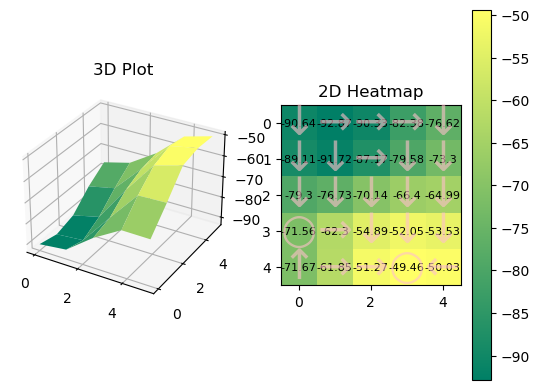

  2%|█▎                                                              | 1995/100000 [00:04<03:28, 469.98it/s]

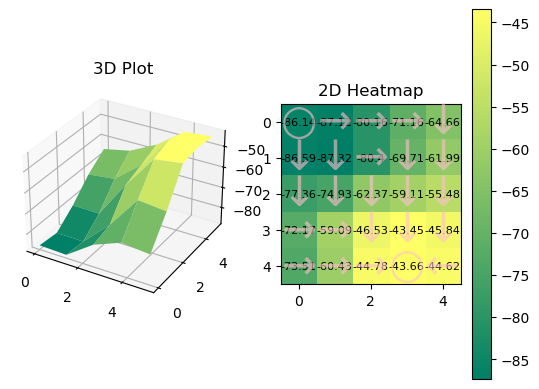

  4%|██▌                                                             | 3987/100000 [00:09<03:24, 468.43it/s]

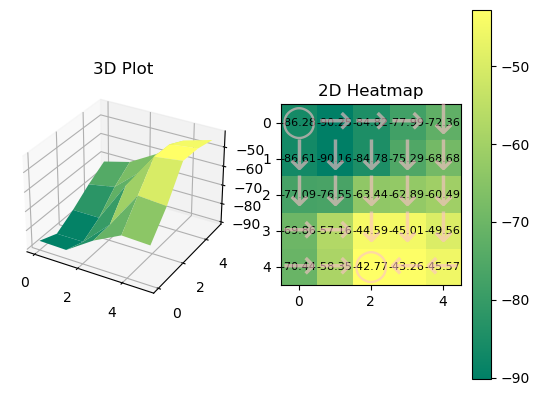

  6%|███▊                                                            | 5995/100000 [00:14<03:17, 475.26it/s]

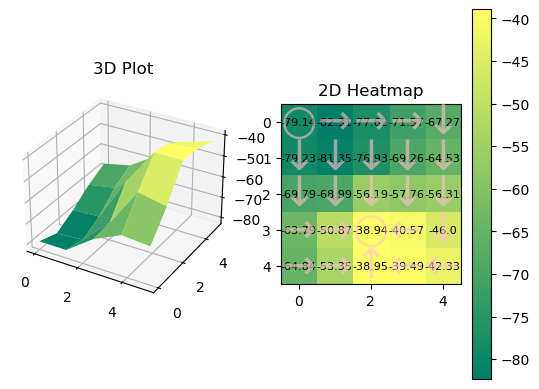

  8%|█████                                                           | 7971/100000 [00:19<03:17, 466.91it/s]

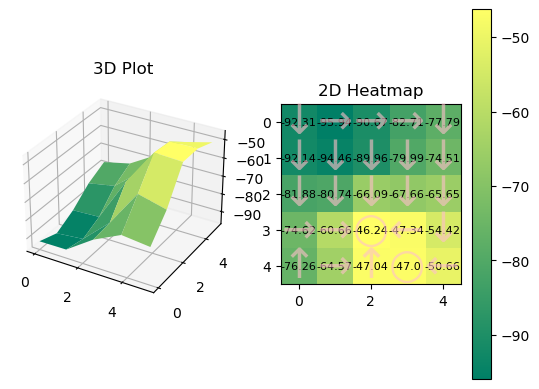

 10%|██████▍                                                         | 9985/100000 [00:23<03:09, 473.87it/s]

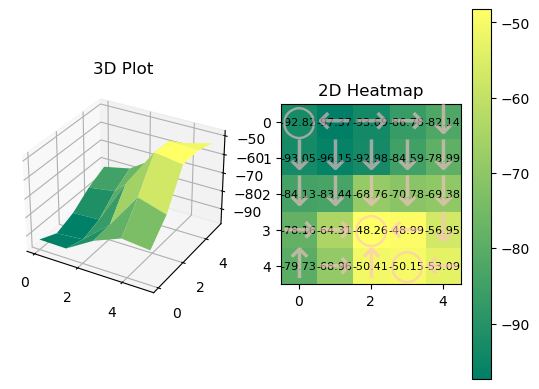

 12%|███████▌                                                       | 11964/100000 [00:28<03:10, 463.29it/s]

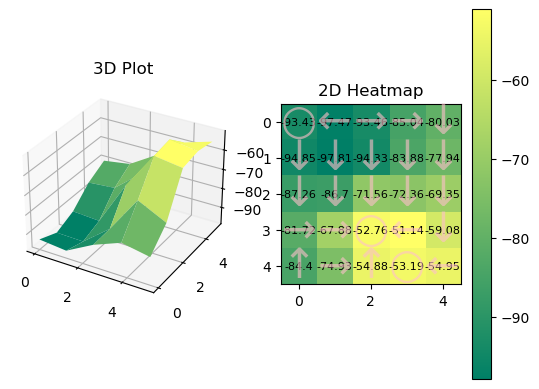

 14%|████████▊                                                      | 13984/100000 [00:33<03:05, 464.04it/s]

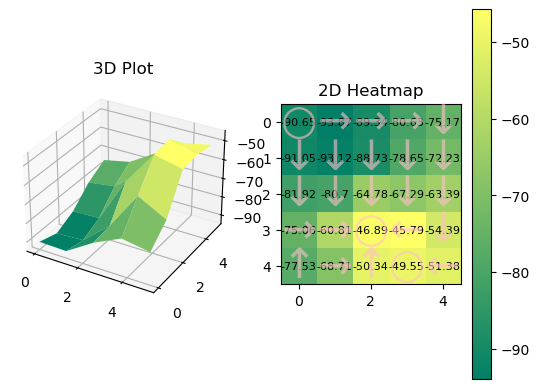

 16%|██████████                                                     | 15957/100000 [00:37<03:02, 460.47it/s]

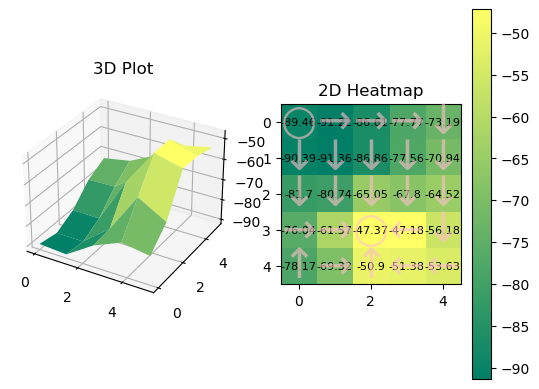

 18%|███████████▎                                                   | 17974/100000 [00:42<02:56, 464.09it/s]

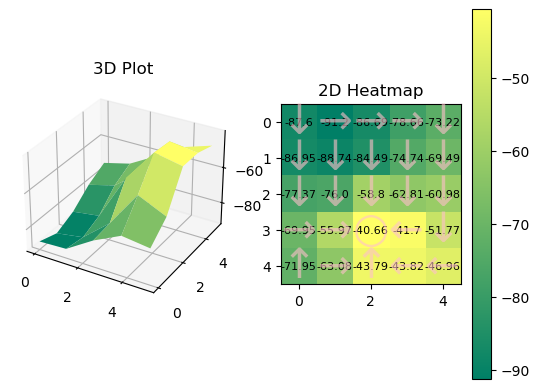

 20%|████████████▌                                                  | 19992/100000 [00:47<02:55, 456.97it/s]

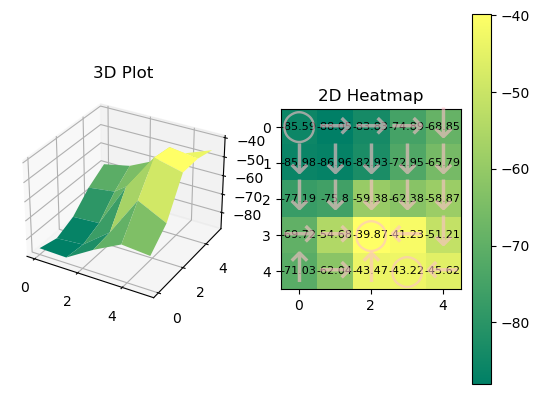

 22%|█████████████▊                                                 | 21965/100000 [00:52<02:48, 462.83it/s]

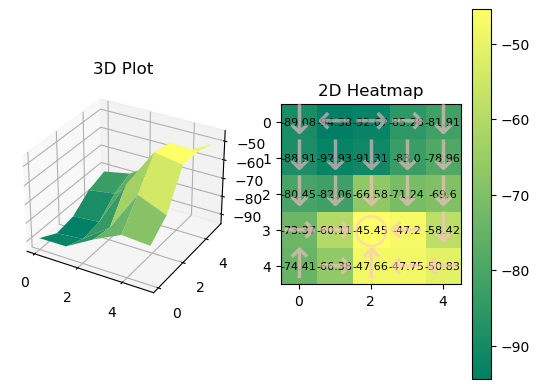

 24%|███████████████                                                | 23988/100000 [00:57<02:45, 458.54it/s]

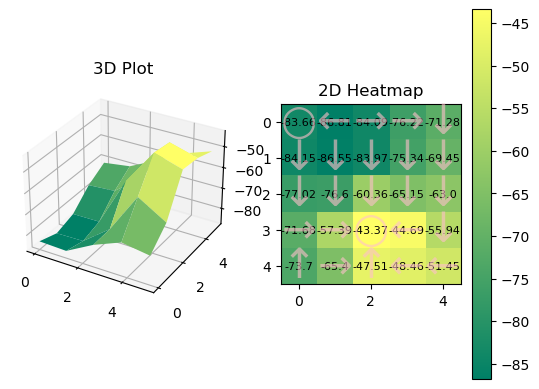

 26%|████████████████▎                                              | 25976/100000 [01:02<02:39, 465.33it/s]

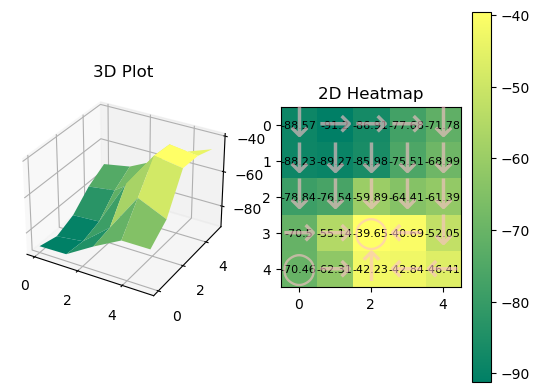

 28%|█████████████████▋                                             | 27996/100000 [01:06<02:34, 466.09it/s]

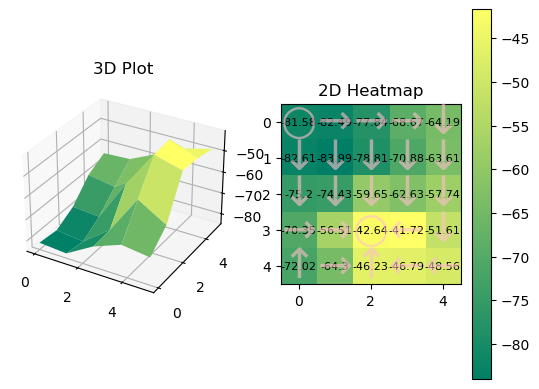

 30%|██████████████████▉                                            | 29965/100000 [01:12<02:44, 424.67it/s]

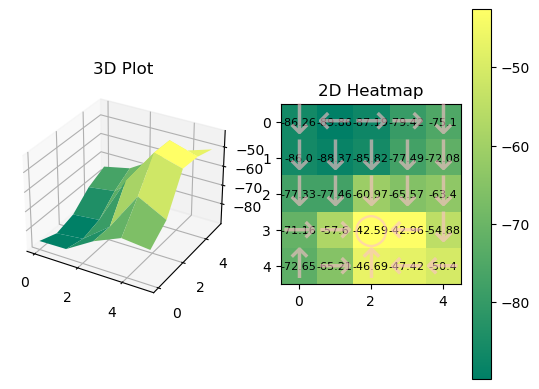

 32%|████████████████████▏                                          | 31979/100000 [01:17<02:25, 466.40it/s]

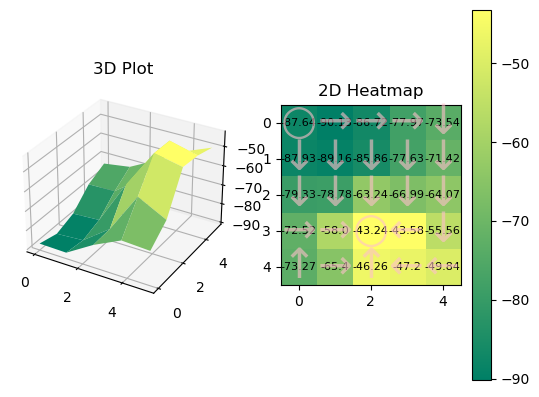

 34%|█████████████████████▍                                         | 34000/100000 [01:21<02:20, 468.22it/s]

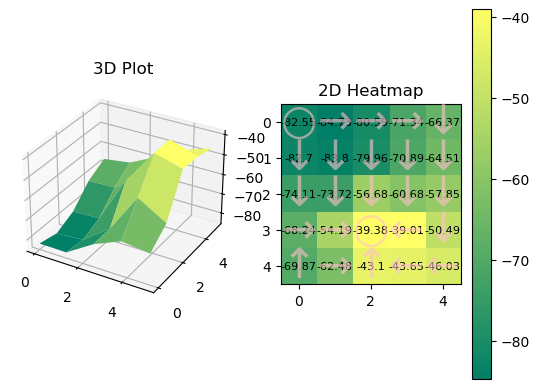

 36%|██████████████████████▋                                        | 35999/100000 [01:26<02:19, 459.15it/s]

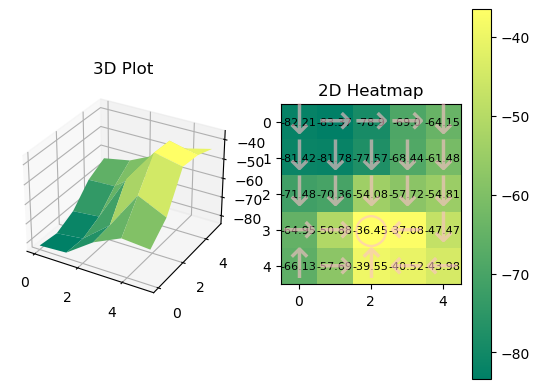

 38%|███████████████████████▉                                       | 37983/100000 [01:31<02:15, 458.53it/s]

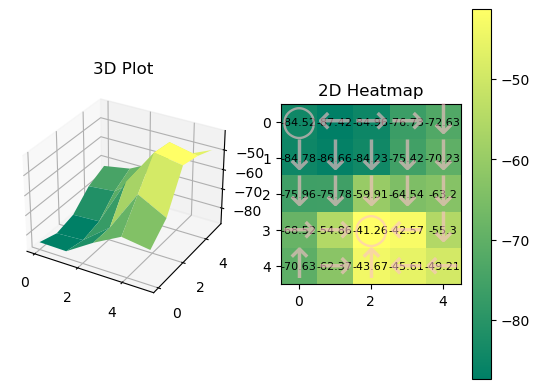

 40%|█████████████████████████▏                                     | 39961/100000 [01:36<02:10, 458.90it/s]

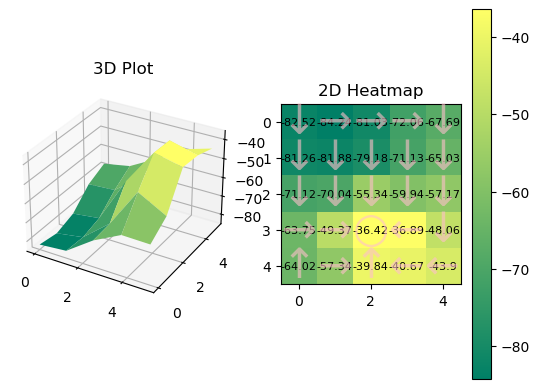

 42%|██████████████████████████▍                                    | 41989/100000 [01:41<02:06, 458.96it/s]

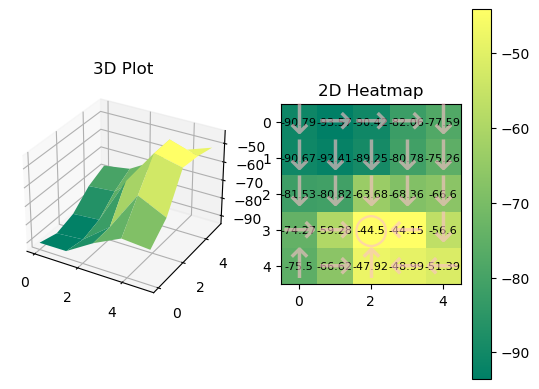

 44%|███████████████████████████▋                                   | 43971/100000 [01:45<02:02, 458.80it/s]

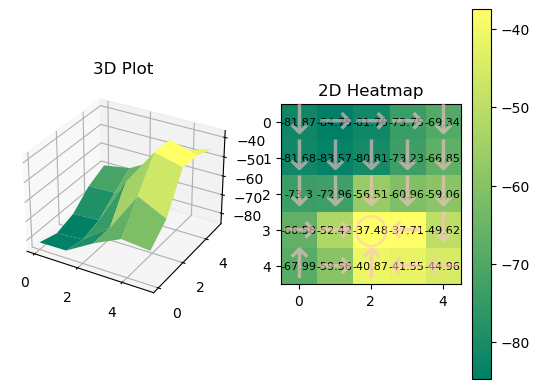

 46%|████████████████████████████▉                                  | 45971/100000 [01:50<01:56, 465.19it/s]

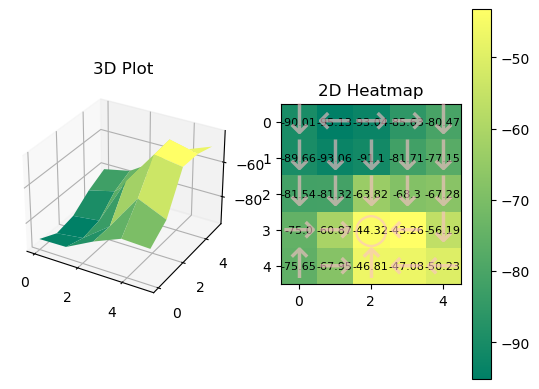

 48%|██████████████████████████████▏                                | 47993/100000 [01:56<02:01, 426.90it/s]

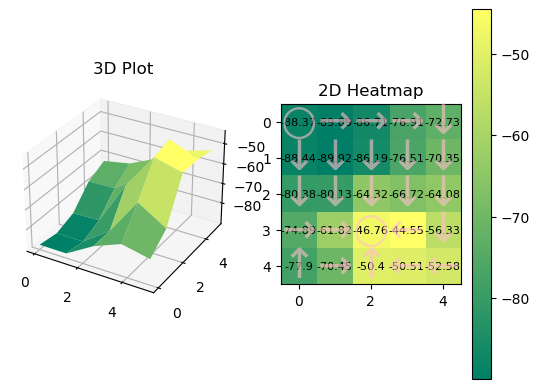

 50%|███████████████████████████████▍                               | 49996/100000 [02:02<02:24, 345.13it/s]

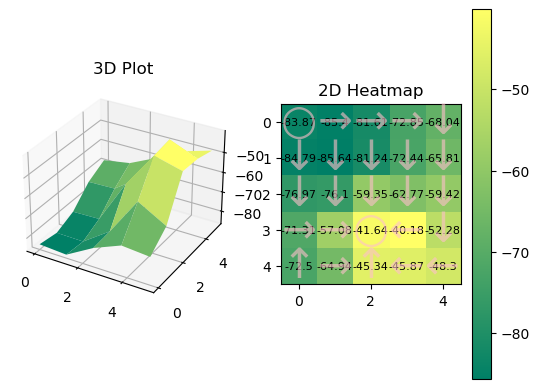

 52%|████████████████████████████████▋                              | 51980/100000 [02:07<01:44, 461.61it/s]

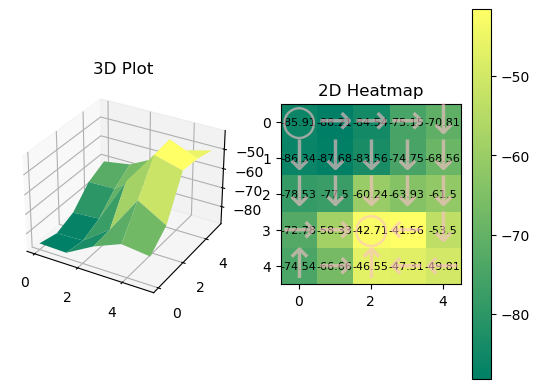

 54%|██████████████████████████████████                             | 54000/100000 [02:12<01:39, 460.57it/s]

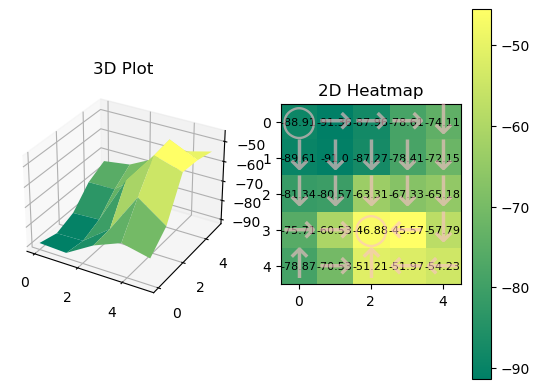

 56%|███████████████████████████████████▎                           | 55974/100000 [02:16<01:35, 462.24it/s]

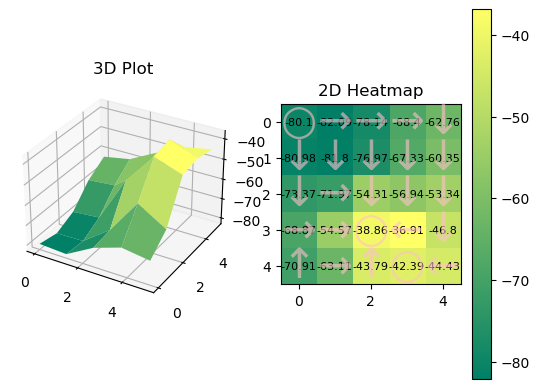

 58%|████████████████████████████████████▌                          | 57979/100000 [02:21<01:30, 462.46it/s]

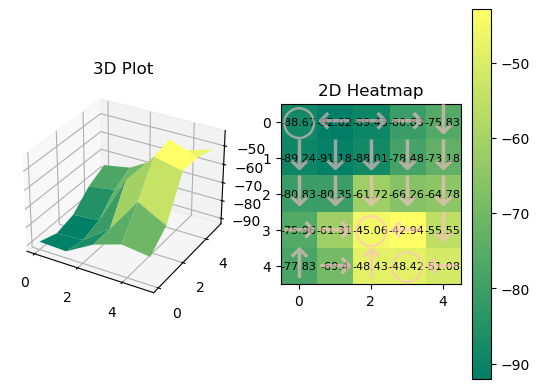

 60%|█████████████████████████████████████▊                         | 59982/100000 [02:26<01:26, 462.49it/s]

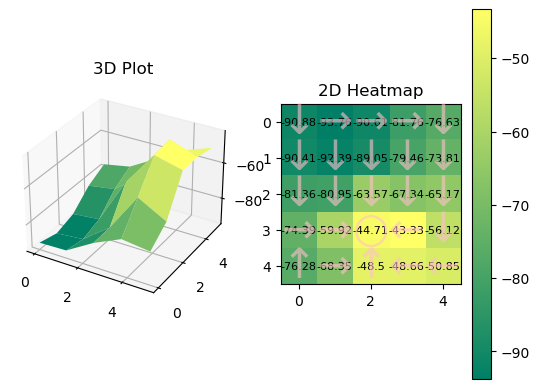

 62%|███████████████████████████████████████                        | 61956/100000 [02:31<01:21, 468.09it/s]

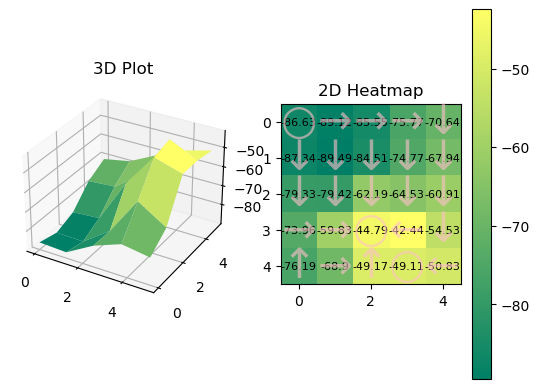

 64%|████████████████████████████████████████▎                      | 63976/100000 [02:36<01:44, 345.39it/s]

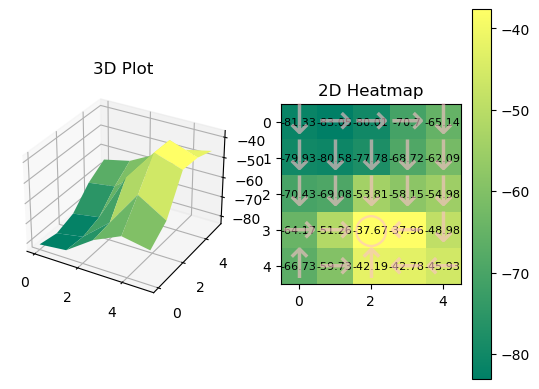

 66%|█████████████████████████████████████████▌                     | 65982/100000 [02:41<01:13, 465.97it/s]

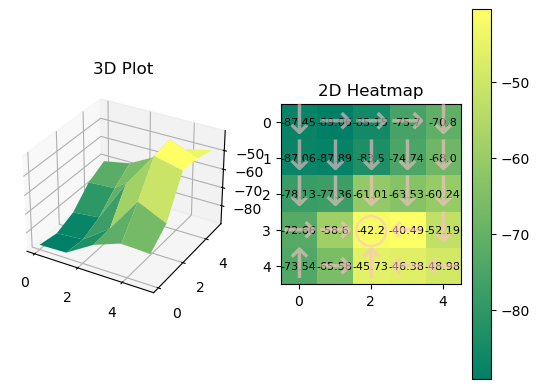

 68%|██████████████████████████████████████████▊                    | 67959/100000 [02:46<01:08, 466.82it/s]

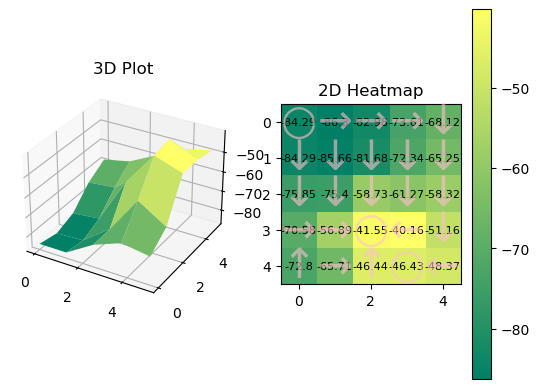

 70%|████████████████████████████████████████████                   | 69978/100000 [02:51<01:05, 460.96it/s]

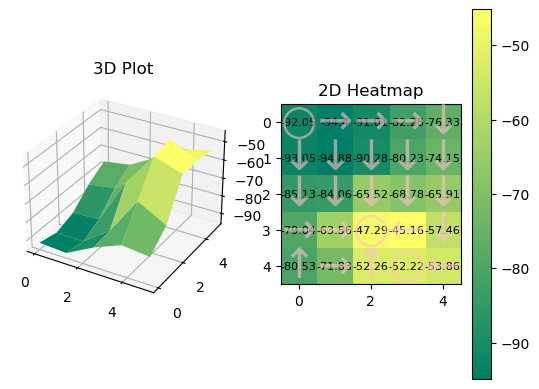

 72%|█████████████████████████████████████████████▎                 | 71993/100000 [02:56<01:00, 460.87it/s]

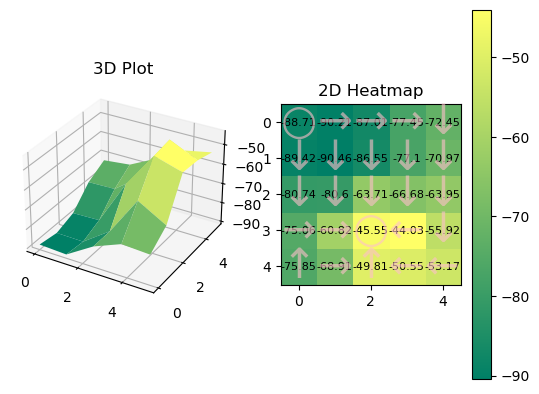

 74%|██████████████████████████████████████████████▌                | 73985/100000 [03:01<00:57, 451.83it/s]

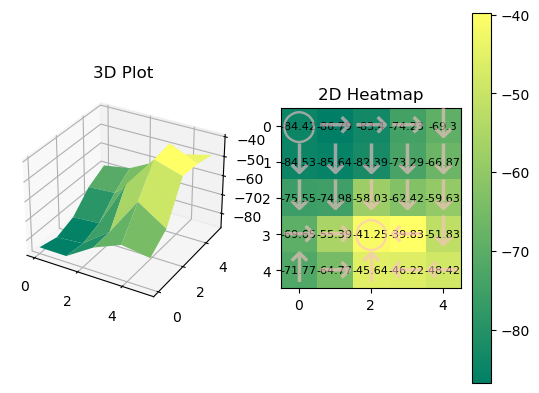

 76%|███████████████████████████████████████████████▊               | 75954/100000 [03:06<00:52, 461.45it/s]

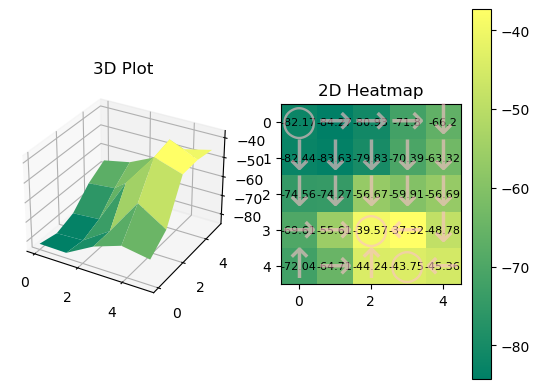

 78%|█████████████████████████████████████████████████▏             | 77979/100000 [03:11<00:47, 462.98it/s]

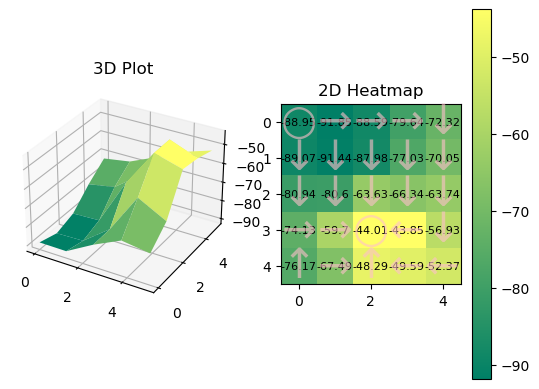

 80%|██████████████████████████████████████████████████▍            | 79999/100000 [03:16<00:43, 462.73it/s]

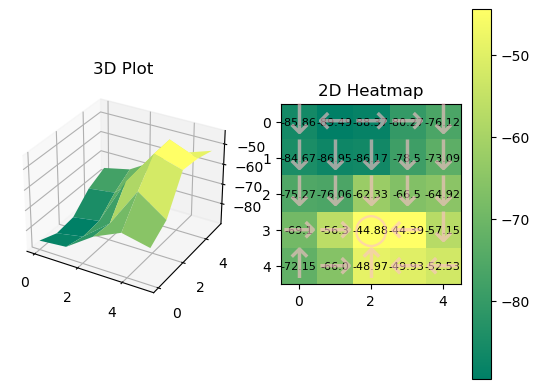

 82%|███████████████████████████████████████████████████▋           | 81972/100000 [03:20<00:38, 464.78it/s]

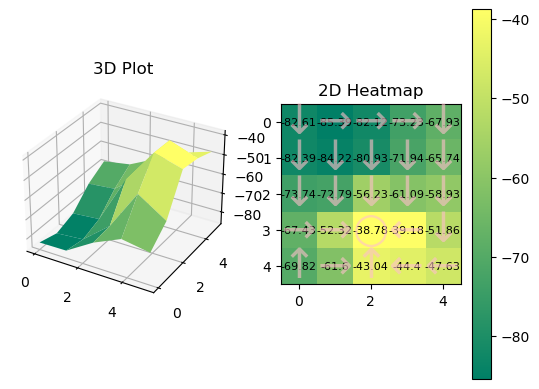

 84%|████████████████████████████████████████████████████▉          | 83993/100000 [03:25<00:34, 464.79it/s]

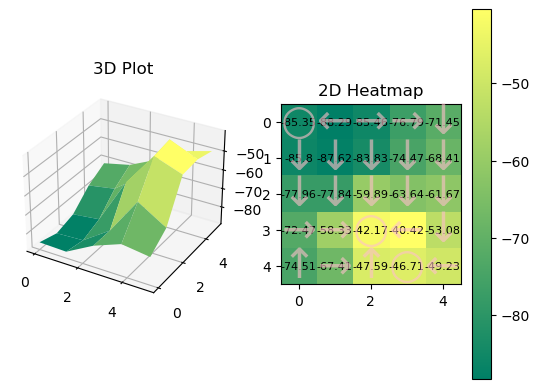

 86%|██████████████████████████████████████████████████████▏        | 85964/100000 [03:30<00:30, 465.19it/s]

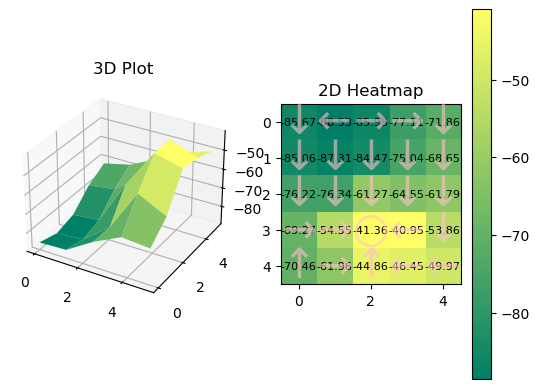

 88%|███████████████████████████████████████████████████████▍       | 87985/100000 [03:35<00:25, 465.04it/s]

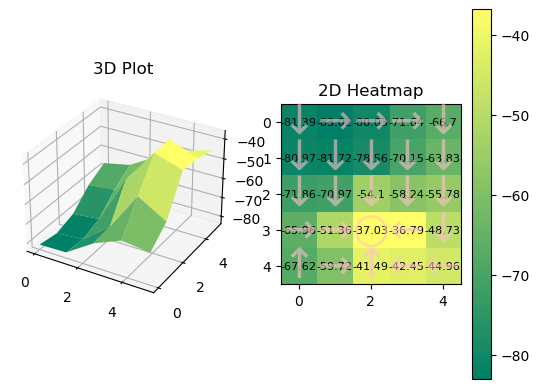

 90%|████████████████████████████████████████████████████████▋      | 89995/100000 [03:40<00:21, 464.82it/s]

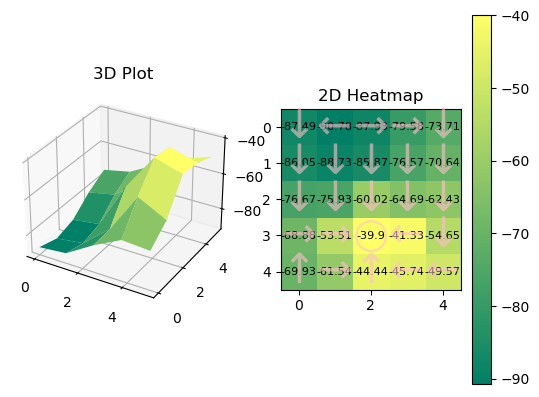

 92%|█████████████████████████████████████████████████████████▉     | 91998/100000 [03:45<00:17, 459.60it/s]

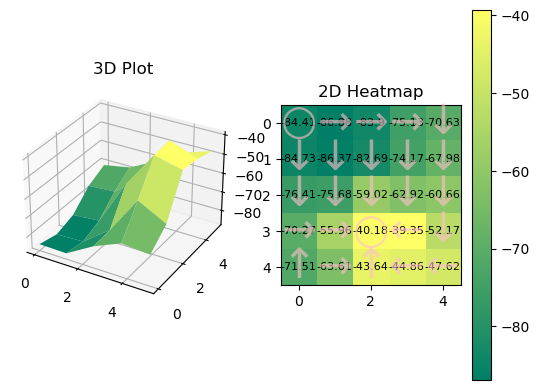

 94%|███████████████████████████████████████████████████████████▏   | 93963/100000 [03:50<00:13, 459.58it/s]

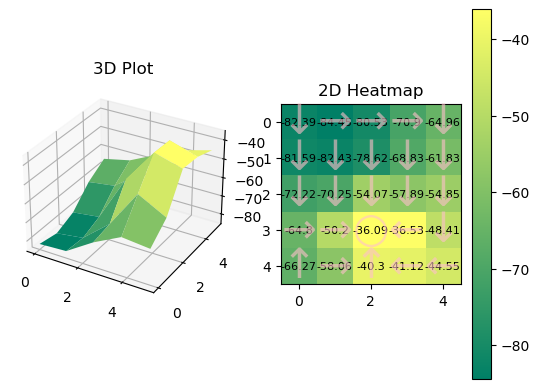

 96%|████████████████████████████████████████████████████████████▍  | 95997/100000 [03:55<00:08, 459.70it/s]

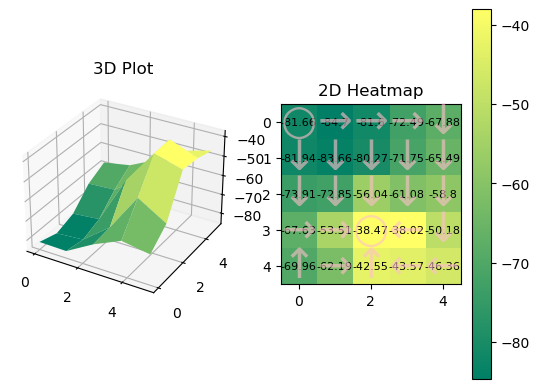

 98%|█████████████████████████████████████████████████████████████▋ | 97960/100000 [03:59<00:04, 459.56it/s]

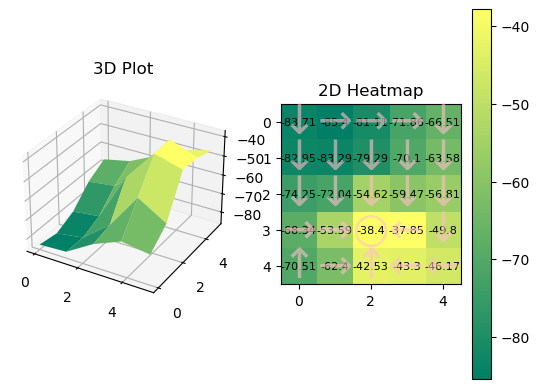

100%|██████████████████████████████████████████████████████████████| 100000/100000 [04:04<00:00, 408.23it/s]


In [22]:
for _ in tqdm.tqdm(range(100000)):
    
    optimizer.zero_grad()
    
    batch = experiencePool.sample_batch(batch_size=batch_size)
    tmpstate, tmpaction, tmpscore, nextState, nextAction, terminal = batch

    tmpstate = tmpstate.reshape(batch_size,1)
    tmpstate = np.hstack((tmpstate // 5, tmpstate % 5))  #将state变成了行列
    nextState = nextState.reshape(batch_size,1)
    nextState = np.hstack((nextState // 5, nextState % 5))  #将state变成了行列

    tmpstate = torch.tensor(tmpstate,dtype = torch.float32).view(batch_size,2)
    nextState = torch.tensor(nextState,dtype = torch.float32).view(batch_size,2)

    tmpaction = torch.tensor(tmpaction,dtype = torch.int).view(batch_size,1)
    nextAction = torch.tensor(nextAction,dtype = torch.int).view(batch_size,1)

    tmpscore = torch.tensor(tmpscore,dtype = torch.float32).view(batch_size,1)
    terminal = torch.tensor(terminal,dtype = torch.float32).view(batch_size,1)

    with torch.no_grad():
        next_state_value = network(nextState)  #网络
        target = tmpscore + (1.0 - terminal) * gamma * next_state_value
    
    now_state_value = network(tmpstate)    #网络
    
    loss = F.mse_loss(now_state_value, target)
    loss.backward()
    optimizer.step()
            
    if _ % 2000 == 0:
        s = np.array([[i] for i in range(25)])
        s = np.hstack((s // 5, s % 5))
        states = torch.tensor(s, dtype = torch.float32).view(25,2)
        # 还原成state_values
        state_values = network(states).view(-1).detach().numpy()
        
        action_values = np.random.rand(25,5)
        for i in range(25):
            for j in range(5):
                score, nextState = gridworld.getScore(i,j)
                action_values[i][j] = score + gamma * state_values[nextState]
        
        p = np.argmax(action_values,axis=1)
        draw(state_values.reshape(5,5), p)